# Table of contents
1. [Regression](#introduction)
2. [Machine Learning Regression models](#listofmodels)
    1. [Simple Linear Regression](#SLR)
    2. [Multiple Linear Regression](#MLR)
    3. [LASSO Regresson](#LASSO)
    5. [Polynomial Regression](#PR)
    6. [Support Vector for Regression (SVR)](#SVR)
    7. [Decision Tree Regression](#DecisionTreeRegression)
    8. [Random Forest Regression](#RandomForestRegression)
3. [Other](#other)

# Regression  <a name="introduction"></a>

Regression models (both linear and non-linear) are used for predicting a real value, like salary for example. If your independent variable is time, then you are forecasting future values, otherwise your model is predicting present but unknown values. Regression technique vary from Linear Regression to SVR and Random Forests Regression.

http://diamondclover.com/simple-linear-regression.html

In [1]:
# important Libraries
import numpy as np # Help work with Multi-Dimensional data 
import pandas as pd # Allows organize and working with tabular data
import scipy # Python ecosystem with tools for scientific calculation (numpy, pandas and matplotlib are part of scipy), Mathematics, ML, Engineering
import statsmodels.api as sm
import matplotlib as plt #2D Plotting library
import seaborn as sns # package built on top of numpy and scipy, which also integrates with pandas. provide very good summaries unmatched for educational purposes.
import sklearn #most widely used machine learning libraries
from sklearn import metrics # includes score functions, performance metrics and pairwise metrics and distance computations.

### Evaluation

https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation

https://scikit-learn.org/stable/modules/metrics.html#metrics

# Simple Linear Regression  <a name="SLR"></a>

Y (Dependent) variable should  be a function of the independent variable X.

Y= mX+b+e

<ul>
    <li>Y = Dependent variable</li>
    <li>X = independent variable</li>
    <li>m = Quantifies effect of X on Y</li>
    <li>b = constant</li>
    <li>e = error of estimation</li>
</ul>

# Linear Regresson Assumotions
<ol>
    <li>✅ LINEARITY: The relationship is linear in nature. Ex: The more a person weighs, the taller they tend to be. </li>
    <li>✅ INDEPENDENCE/ NO AUTOCORRELATION: Most statistical tests assume the independence of observations. In other words, the occurrence of one tells nothing about the occurrence of the other. Autocorrelation is problematic for most statistical tests because it refers to the lack of independence between values. Alternative is Autoregressive/moving average/autoregressive moving average/autoregressive integrated moving average model</li>
    <li>✅ HOMOSCEDASTICITY: The variance of the errors should be constant across all levels of study time. This ensures that the spread of the residuals is similar for all levels of study time, leading to more accurate predictions. LOG tranformation can help sometimes. </li>
    <li>✅ NORMALITY: The distribution of the residuals should be bell-shaped and symmetrical. This ensures that the errors are normally distributed, as in a study on the distribution of incomes.</li>
    <li>✅ NO MULTICOLLINEARITY: Education level and years of experience should not be highly correlated with each other. This ensures that there is no perfect linear relationship between the independent variables, leading to more accurate predictions. Fixes: Drop one variable/Transform into one/keep both with caution</li>
    <li>✅ NO ENDOGENEITY: There is no relationship between the errors and the independent variables. (Omitted Variable Bias)</li>
</ol>


https://www.linkedin.com/pulse/maximize-your-datas-potential-5-assumptions-you-need-know-akilan-km/

https://www.analyticsvidhya.com/blog/2016/07/deeper-regression-analysis-assumptions-plots-solutions/ons.

# Simple Linear Regression - With Sklearn - Example 1 

In [67]:
## Import the relevant librariesimport numpy as np # Help work with Multi-Dimensional data 
import statsmodels.api as sm

# We can override the default matplotlib styles with those of Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data
data = pd.read_csv('./resources/ML 101 with Scikit-learn and StatsModels/1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [68]:
# This method gives us very nice descriptive statistics. We don't need this as of now, but will later on!
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [69]:
data.iloc[:, 0]

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

In [73]:
# Alternative method
X=data['SAT']
y=data['GPA']
X_matrix=X.values.reshape(-1,1)
X_matrix.shape
regressor = LinearRegression()
regressor.fit(X_matrix, data['GPA'],y)

# Alternative method
regressor = LinearRegression()
regressor.fit(data[['SAT']], data['GPA'])

LinearRegression()

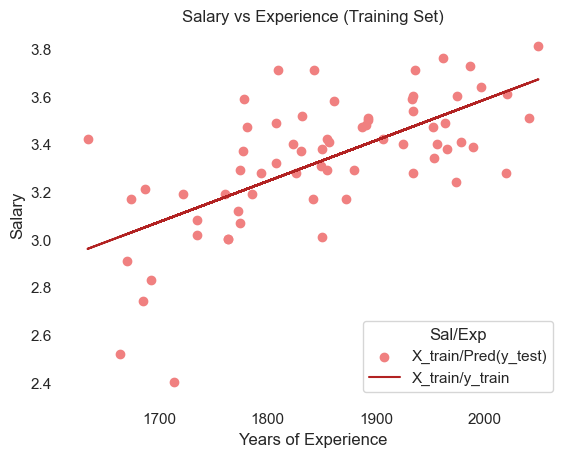

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Simple Linear Regression
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :1], data.iloc[:, 1:], test_size = 0.2, random_state = 0)

# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

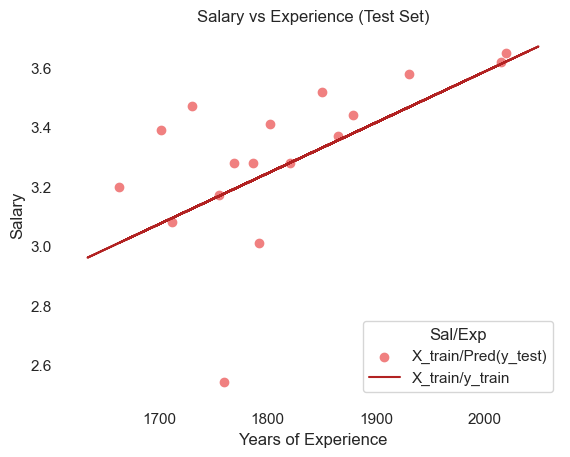

In [72]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [7]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[0.00171033]]
Intercept: [0.16586478]


# Simple Linear Regression - With StatsModel - Example 1 

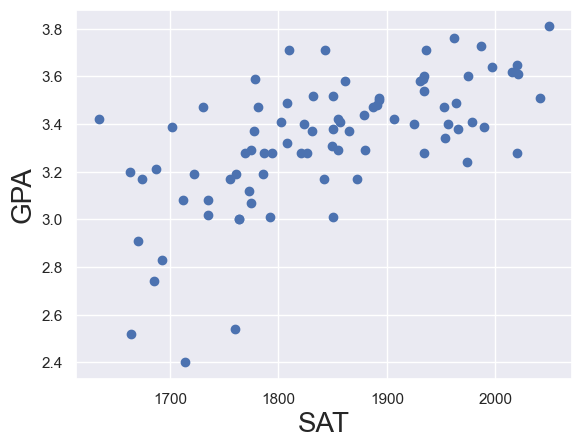

In [8]:
# Import statements
import statsmodels.api as sm

## Define the dependent and the independent variables
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data ['SAT']

## Explore the data
plt.scatter(x1,y)
# Name the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
#plt.legend(["x*2" , "x*3"])

# Show the plot
plt.show()

In [9]:
## Simple Linear Regression
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           7.20e-11
Time:                        11:30:57   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
data['prediction'] = results.predict(x)
data

,SAT,GPA,prediction
0,1714,2.40,3.112890
1,1664,2.52,3.030105
2,1760,2.54,3.189051
3,1685,2.74,3.064875
4,1693,2.83,3.078120
...,...,...,...
79,1936,3.71,3.480452
80,1810,3.71,3.271836
81,1987,3.73,3.564892
82,1962,3.76,3.523500


<h2> Explaination of Above three tables:</h2>
<ul>
    <li>Model Summary</li>
    <li>Co-effecient's table</li>
    <li>Some additional test</li>
    <li>https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a</li>
    <li>https://www.adrian.idv.hk/2021-07-16-statsmodels/</li>
</ul>

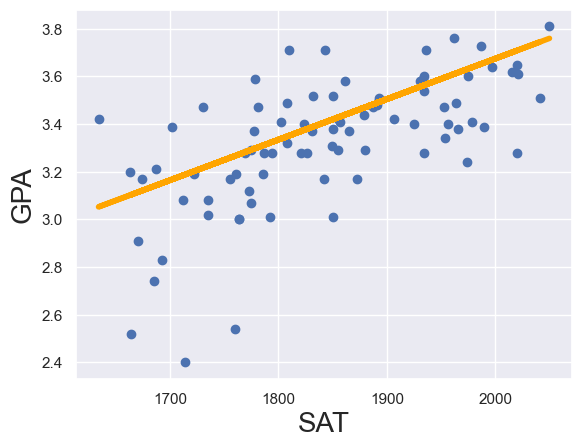

In [11]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 0.0017*x1 + 0.275
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Simple Linear Regression - With Sklearn - Example 2

In [12]:
## Import the relevant libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Load the data
df=pd.read_csv('./resources/ML 101 with Scikit-learn and StatsModels/real_estate_price_size.csv')
df

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


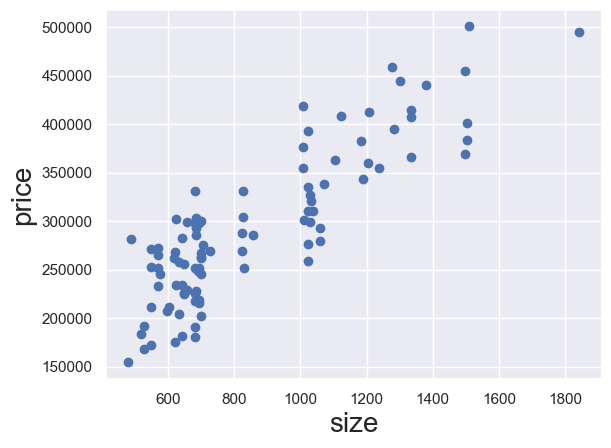

In [13]:
### Explore the data
plt.scatter(df['size'],df['price'])
# Label the axes
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

In [14]:
## Create the regression
### Declare the dependent and the independent variables
X=df[['size']]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.20,random_state=0)

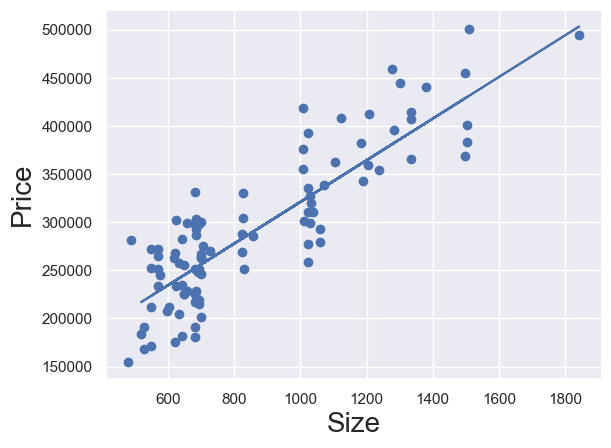

In [15]:
### Regression itself
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)


### Plot the regression line on the initial scatter
plt.scatter(X,y)
plt.plot(X_train, y_train_pred)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

# Simple Linear Regression - With StatsModel - Example 2

In [16]:
## Import the relevant libraries
import pandas as pd
import numpy as np 
import statsmodels.api as sm
# We can override the default matplotlib styles with those of Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data
df=pd.read_csv('./resources/ML 101 with Scikit-learn and StatsModels/real_estate_price_size.csv')
df

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


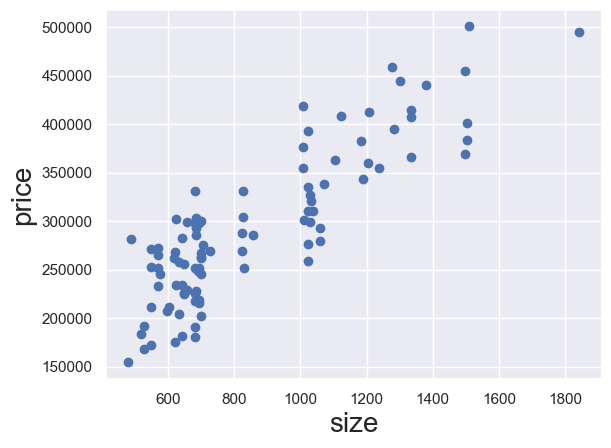

In [17]:
## Define the dependent and the independent variables
# Following the regression equation, our dependent variable (y) is the price
y = df['price']
# Similarly, our independent variable (x) is the size  
x1 = df['size']

## Explore the data
plt.scatter(x1,y)
# Name the axes
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
#plt.legend(["x*2" , "x*3"])

# Show the plot
plt.show()

In [18]:
## Simple Linear Regression
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           8.13e-31
Time:                        11:30:58   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

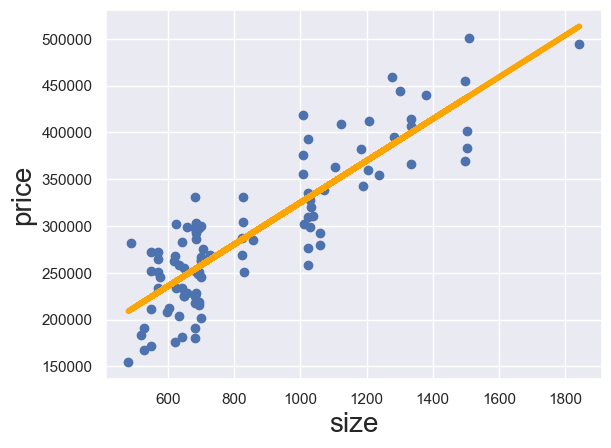

In [19]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 223.1787*x1 + 1.019e+05	 	
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

In [20]:
df['prediction'] = results.predict(x)
df

,price,size,prediction
0,234314.144,643.09,245436.619376
1,228581.528,656.22,248366.956267
2,281626.336,487.29,210665.371280
3,401255.608,1504.75,437740.814720
4,458674.256,1275.46,386568.160831
...,...,...,...
95,252460.400,549.80,224616.274480
96,310522.592,1037.44,333447.156519
97,383635.568,1504.75,437740.814720
98,225145.248,648.29,246597.148838


# Multiple Linear Regression  <a name="MLR"></a>

If there are any categorical variable they need to be converted to continuous variable

#### Adjusted R-squared

https://www.analyticsvidhya.com/blog/2020/07/difference-between-r-squared-and-adjusted-r-squared/

# Multiple Linear Regression - Example 1 - Sklearn

In [21]:
# The data is located in the file: 'real_estate_price_size_year.csv'. You are expected to create a multiple linear regression, using the new data.
# In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

## Import the relevant libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 


## Load the data
df=pd.read_csv('./resources/ML 101 with Scikit-learn and StatsModels/real_estate_price_size_year.csv')
df

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [22]:
df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [23]:
### Declare the dependent and the independent variables
X = df[['size','year']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
## Create the regression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

### Regression
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print("r2_score::",metrics.r2_score(y_test, y_test_pred),
      "mean_absolute_error::",metrics.mean_absolute_error(y_test, y_test_pred),
      "mean_squared_error::",metrics.mean_squared_error(y_test, y_test_pred),
       "mean_absolute_percentage_error::", metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r2_score:: 0.7664358876723643 mean_absolute_error:: 34484.48198849325 mean_squared_error:: 1682475888.8176405 mean_absolute_percentage_error:: 0.1301602356115454


# Multiple Linear Regression - Example 1 - StatsModel

In [25]:
## Import the relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



## Load the data
df=pd.read_csv('./resources/ML 101 with Scikit-learn and StatsModels/real_estate_price_size_year.csv')
df

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [26]:
df[df['year']==2015]

,price,size,year
0,234314.144,643.09,2015
3,401255.608,1504.75,2015
6,265129.064,570.89,2015
12,215472.104,694.52,2015
20,268125.080,620.71,2015
21,171795.240,549.69,2015
22,412569.472,1207.45,2015
23,183459.488,518.38,2015
27,406852.304,1334.10,2015
28,297760.440,681.07,2015


In [27]:
### Declare the dependent and the independent variables
x1 = df[['size','year']]
y = df['price']


x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           2.77e-32
Time:                        11:30:58   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
df['prediction'] = results.predict(x)
df

,price,size,year,prediction
0,234314.144,643.09,2015,251487.558319
1,228581.528,656.22,2009,236976.558571
2,281626.336,487.29,2018,224762.121245
3,401255.608,1504.75,2015,447688.276183
4,458674.256,1275.46,2009,377978.035407
...,...,...,...,...
95,252460.400,549.80,2009,212744.633688
96,310522.592,1037.44,2009,323780.678136
97,383635.568,1504.75,2006,421437.208242
98,225145.248,648.29,2015,252671.602760


# Multiple Linear Regression - Example 2 - Sklearn with dummy var
You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

In [29]:
## Import the relevant libraries
import numpy as np
import pandas as pd

## Read data
df=pd.read_csv('./resources/ML 101 with Scikit-learn and StatsModels/real_estate_price_size_year_view.csv')
df['view_num'] = df['view'].map({'Sea view':1,'No sea view':0 })
df

,price,size,year,view,view_num
0,234314.144,643.09,2015,No sea view,0
1,228581.528,656.22,2009,No sea view,0
2,281626.336,487.29,2018,Sea view,1
3,401255.608,1504.75,2015,No sea view,0
4,458674.256,1275.46,2009,Sea view,1
...,...,...,...,...,...
95,252460.400,549.80,2009,Sea view,1
96,310522.592,1037.44,2009,No sea view,0
97,383635.568,1504.75,2006,No sea view,0
98,225145.248,648.29,2015,No sea view,0


In [30]:
df.describe()

,price,size,year,view_num
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


In [31]:
df.columns

Index(['price', 'size', 'year', 'view', 'view_num'], dtype='object')

In [32]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

X= df[['size', 'year', 'view_num']]
y=df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [33]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [34]:
print("r2_score::",metrics.r2_score(y_test, y_test_pred),
      "mean_absolute_error::",metrics.mean_absolute_error(y_test, y_test_pred),
      "mean_squared_error::",metrics.mean_squared_error(y_test, y_test_pred),
      "mean_absolute_percentage_error::", metrics.mean_absolute_percentage_error(y_test, y_test_pred))

r2_score:: 0.8635222369240964 mean_absolute_error:: 21320.72243798301 mean_squared_error:: 983115699.7821242 mean_absolute_percentage_error:: 0.07419142036569167


# Multiple Linear Regression - Example 2 - Sklearn with dummy var StatsModel

In [35]:
## Import the relevant libraries
import numpy as np
import pandas as pd

## Read data
df=pd.read_csv('./resources/ML 101 with Scikit-learn and StatsModels/real_estate_price_size_year_view.csv')
df['view_num'] = df['view'].map({'Sea view':1,'No sea view':0 })
df

,price,size,year,view,view_num
0,234314.144,643.09,2015,No sea view,0
1,228581.528,656.22,2009,No sea view,0
2,281626.336,487.29,2018,Sea view,1
3,401255.608,1504.75,2015,No sea view,0
4,458674.256,1275.46,2009,Sea view,1
...,...,...,...,...,...
95,252460.400,549.80,2009,Sea view,1
96,310522.592,1037.44,2009,No sea view,0
97,383635.568,1504.75,2006,No sea view,0
98,225145.248,648.29,2015,No sea view,0


In [36]:
import statsmodels.api as sm
import seaborn as sns
sns.set()

y = df['price']
x1 = df[['size','year','view_num']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.02e-50
Time:                        11:30:59   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view_num    5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
df['prediction'] = results.predict(x)
df

,price,size,year,view,view_num,prediction
0,234314.144,643.09,2015,No sea view,0,224197.233189
1,228581.528,656.22,2009,No sea view,0,210811.945021
2,281626.336,487.29,2018,Sea view,1,254331.773344
3,401255.608,1504.75,2015,No sea view,0,416374.658398
4,458674.256,1275.46,2009,Sea view,1,405648.064843
...,...,...,...,...,...,...
95,252460.400,549.80,2009,Sea view,1,243802.939878
96,310522.592,1037.44,2009,No sea view,0,295836.058985
97,383635.568,1504.75,2006,No sea view,0,391904.118401
98,225145.248,648.29,2015,No sea view,0,225356.997610


# Polynomial Regression  <a name="PR"></a>

# Support Vector for Regression (SVR) <a name="SVR"></a>

# Decision Tree Regression  <a name="DecisionTreeRegression"></a>

In [1]:
from sklearn.tree import DecisionTreeRegressor 

#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100,random_state=1)

# Fit the model
iowa_model.fit(X,y)

# prediction
predictions = iowa_model.predict(X)

NameError: name 'X' is not defined

# Random Forest Regression  <a name="RandomForestRegression"></a>

Decision trees leave you with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

Even today's most sophisticated modeling techniques face this tension between underfitting and overfitting. But, many models have clever ideas that can lead to better performance. We'll look at the random forest as an example.

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

NameError: name 'train_X' is not defined

# LASSO Regression  <a name="LASSO"></a>

### Feature Selection Using Lasso Regression
https://medium.com/@agrawalsam1997/feature-selection-using-lasso-regression-10f49c973f08